In [2]:
# numpy, pandas 라이브러리 불러오기
import numpy as np
import pandas as pd

# **1. Series**

### 1) Series 객체 생성

```
pd.Series(data, index = )
```


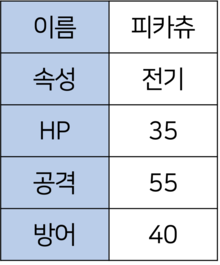

In [3]:
# [방법1] list 사용
# 객체 이름: obj
obj=pd.Series(['피카츄','전기',35,55,40], index=['이름','속성','HP','공격','방어'])
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

In [4]:
# [방법2] tuple 사용
# 데이터 값 : 'value' 변수에 저장
# index 값 : 'index_name' 변수에 저장
# 객체 이름: obj
value =('피카츄', '전기',35,55,40)
index_name =('이름','속성','HP','공격','방어')
obj=pd.Series(value,index=index_name)
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

In [7]:
# [방법3] Dictionary 사용
# 객체 이름: obj
obj=pd.Series({'이름':'피카츄','속성':'전기','HP':35,'공격':55,'방어':40})
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

### 2) Series 속성 확인

In [8]:
# obj 객체의 index 확인
obj.index

Index(['이름', '속성', 'HP', '공격', '방어'], dtype='object')

In [9]:
# obj 객체의 데이터 값(value) 확인
obj.values

array(['피카츄', '전기', 35, 55, 40], dtype=object)

In [11]:
# obj 객체의 결측치 확인
# 결측치인 값: True 출력, 결측치가 아닌 값: False 출력
obj.isnull()

이름    False
속성    False
HP    False
공격    False
방어    False
dtype: bool

In [12]:
# obj 객체의 결측치 확인
# 결측치인 값: False 출력, 결측치가 아닌 값: True 출력
obj.notnull()

이름    True
속성    True
HP    True
공격    True
방어    True
dtype: bool

### 3) Series 데이터 선택

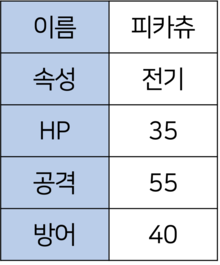

- 피카츄의 속성은 무엇일까? (인덱싱)

In [13]:
# [방법1] index 이름 사용
obj['속성']

'전기'

In [17]:
# [방법2] loc 사용
obj.loc['속성']

'전기'

In [18]:
# [방법3] iloc 사용
obj.iloc[1]

'전기'

- 피카츄의 HP, 공격, 방어 수치는? (슬라이싱)



In [20]:
# [방법1] index 이름 사용 대괄호 2개
obj[['HP','공격','방어']]

HP    35
공격    55
방어    40
dtype: object

In [21]:
# [방법2] loc 사용
# index 이름 'HP'부터 '방어'까지 출력
obj.loc['HP':'방어']

HP    35
공격    55
방어    40
dtype: object

In [23]:
# [방법3] iloc 사용
# index 번호 2부터 4까지 출력
obj.iloc[2:5]

HP    35
공격    55
방어    40
dtype: object

### 4) Series 데이터 연산

- 단일 Series내 연산

In [24]:
# 피카츄의 HP가 2배 증가
# 데이터 선택 방법: loc을 사용한 인덱싱
obj.loc['HP']*=2
obj

이름    피카츄
속성     전기
HP     70
공격     55
방어     40
dtype: object

In [32]:
# 피카츄의 공격력과 방어력이 2배 감소
# 데이터 선택 방법: iloc을 사용한 슬라이싱
# 공격(3), 방어(4)
obj.iloc[[3,4]]/=2
obj

이름     피카츄
속성      전기
HP      70
공격    27.5
방어    20.0
dtype: object

In [34]:
# HP, 공격, 방어 총합 계산
# 데이터 선택 방법: loc을 사용한 슬라이싱
# 집계함수 활용
obj.loc['HP':'방어'].sum()

117.5

In [36]:
# HP(2), 공격, 방어(4) 평균 계산
# 데이터 선택 방법: iloc을 사용한 슬라이싱
# 집계함수 활용
obj.iloc[2:5].mean()

39.166666666666664

- 2개의 Series간 연산

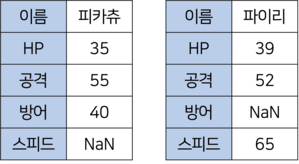

In [42]:
# 위와 같은 2개의 obj1, obj2 series 객체 생성 (결측치는 np.nan 삽입)
# obj1은 list를 사용해 series 생성
obj1=pd.Series(['피카츄',35,55,40,np.nan],index=['이름','HP','공격','방어','스피드'])
# obj2는 dictionary를 사용해 series 생성
obj2=pd.Series({'이름':'파이리','HP':39,'공격':52,'방어':np.nan,'스피드':65})
print(obj1)
print(obj2)

이름     피카츄
HP      35
공격      55
방어      40
스피드    NaN
dtype: object
이름     파이리
HP      39
공격      52
방어     NaN
스피드     65
dtype: object


In [46]:
# obj1 객체의 수치 부분만 obj1_num 변수에 저장 (loc사용)
# obj2 객체의 수치 부분만 obj2_num 변수에 저장 (iloc 사용)
obj1_num=obj1.loc['HP':'스피드']
obj2_num=obj2.iloc[1:5]
print(obj1_num)
print(obj2_num)

HP      35
공격      55
방어      40
스피드    NaN
dtype: object
HP      39
공격      52
방어     NaN
스피드     65
dtype: object


In [47]:
# obj1_num과 obj2_num 덧셈
# 더하기 기호 사용
obj1_num+obj2_num

HP      74
공격     107
방어     NaN
스피드    NaN
dtype: object

In [48]:
# obj1_num과 obj2_num 덧셈
# .add 함수 사용
obj1_num.add(obj2_num)

HP      74
공격     107
방어     NaN
스피드    NaN
dtype: object

In [51]:
# obj1_num과 obj2_num 덧셈
# 결측치 30으로 채우기
obj1_num.add(obj2_num,fill_value=30)

HP      74
공격     107
방어      70
스피드     95
dtype: object

# **2. Data Frame**

### 0) csv 파일 불러오기

In [61]:
# 실습 데이터가 구글 Drive에 있는 경우, gdrive와 연동해야 함
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [69]:
# pokemon.csv 파일 읽어와서 'df' 변수에 저장
# gdrive에 파일 저장했을 경우, 파일경로: /content/gdrive/My Drive/pokemon.csv
df=pd.read_csv('/content/gdrive/MyDrive/pokemon.csv')

### 1) DataFrame 속성 확인

In [70]:
# DataFrame 정보(행과 열의 개수, 결측치, 데이터타입 등) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   #           800 non-null    int64 
 2   Name        800 non-null    object
 3   Type 1      800 non-null    object
 4   Type 2      414 non-null    object
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [71]:
# DataFrame의 column 확인
df.columns

Index(['Unnamed: 0', '#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [72]:
# DataFrame의 index 확인
df.index

RangeIndex(start=0, stop=800, step=1)

In [73]:
# DataFrame 속 데이터 상단 5개의 행 출력
df.head(5)

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [74]:
# DataFrame 속 데이터 하단 7개의 행 출력
df.tail(7)

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
793,793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


- 결측치 확인 및 처리

```
# 결측치 확인
df.isnull()
df.isna()

df.notnull()
df.notna()

# 결측치 처리
df.fillna('결측치 채울 값')
df.dropna()
```



In [77]:
# column별 결측치 수 확인
df.isnull().sum(axis=0)

Unnamed: 0      0
#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [78]:
# 결측치 'Normal'로 채우기
df.fillna('Normal')

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,Normal,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [79]:
# 결측치 포함하고 있는 행 삭제
df.dropna()

,Unnamed: 0,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


### 2) DataFrame 데이터 선택

- 행(row) 선택

```
# loc 사용
df.loc['row 이름']
# iloc 사용
df.iloc[row 번호]
```

In [80]:
# 'Name'열을 index로 지정
df.set_index('Name',inplace=True)
df

,Unnamed: 0,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,0,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,1,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,2,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,4,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,795,719,Rock,Fairy,50,100,150,100,150,50,6,True
DiancieMega Diancie,796,719,Rock,Fairy,50,160,110,160,110,110,6,True
HoopaHoopa Confined,797,720,Psychic,Ghost,80,110,60,150,130,70,6,True


In [81]:
# 피카츄(Pikachu)행 선택
# loc 사용
df.loc['Pikachu']

Unnamed: 0          30
#                   25
Type 1        Electric
Type 2             NaN
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: Pikachu, dtype: object

In [83]:
# 피카츄(Pikachu)와 라이츄(Raichu)행 선택
# loc 사용
# 2개 이상 행 선택 시, 대괄호 2개 필요!
df.loc[['Pikachu','Raichu']]

,Unnamed: 0,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Pikachu,30,25,Electric,NaN,35,55,40,50,50,90,1,False
Raichu,31,26,Electric,NaN,60,90,55,90,80,110,1,False


- 열(column) 선택


```
df['column명']
```



In [84]:
# Speed열 선택
df['Speed']

Name
Bulbasaur                 45
Ivysaur                   60
Venusaur                  80
VenusaurMega Venusaur     80
Charmander                65
                        ... 
Diancie                   50
DiancieMega Diancie      110
HoopaHoopa Confined       70
HoopaHoopa Unbound        80
Volcanion                 70
Name: Speed, Length: 800, dtype: int64

In [86]:
# 포켓몬들의 Speed 평균값
df['Speed'].mean()

68.2775

In [87]:
# 포켓몬들의 Speed 중앙값
df['Speed'].median()

65.0

In [88]:
# 'Type 1'열 선택
df['Type 1']

Name
Bulbasaur                  Grass
Ivysaur                    Grass
Venusaur                   Grass
VenusaurMega Venusaur      Grass
Charmander                  Fire
                          ...   
Diancie                     Rock
DiancieMega Diancie         Rock
HoopaHoopa Confined      Psychic
HoopaHoopa Unbound       Psychic
Volcanion                   Fire
Name: Type 1, Length: 800, dtype: object

In [90]:
# Type1이 Water인 데이터 선택 (데이터 필터링)
df[df['Type 1']=='Water']

,Unnamed: 0,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Squirtle,9,7,Water,NaN,44,48,65,50,64,43,1,False
Wartortle,10,8,Water,NaN,59,63,80,65,80,58,1,False
Blastoise,11,9,Water,NaN,79,83,100,85,105,78,1,False
BlastoiseMega Blastoise,12,9,Water,NaN,79,103,120,135,115,78,1,False
Psyduck,59,54,Water,NaN,50,52,48,65,50,55,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Froakie,724,656,Water,NaN,41,56,40,62,44,71,6,False
Frogadier,725,657,Water,NaN,54,63,52,83,56,97,6,False
Greninja,726,658,Water,Dark,72,95,67,103,71,122,6,False


In [92]:
# HP가 50 이상인 데이터 선택 (데이터 필터링)
df[df['HP']>=50]

,Unnamed: 0,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Ivysaur,1,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,2,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmeleon,5,5,Fire,NaN,58,64,58,80,65,80,1,False
Charizard,6,6,Fire,Flying,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,795,719,Rock,Fairy,50,100,150,100,150,50,6,True
DiancieMega Diancie,796,719,Rock,Fairy,50,160,110,160,110,110,6,True
HoopaHoopa Confined,797,720,Psychic,Ghost,80,110,60,150,130,70,6,True


In [95]:
# Type1이 Water이고, HP가 50 이상인 데이터 선택 (데이터 필터링)
df[(df['Type 1']=='Water')&(df['HP']>=50)]

,Unnamed: 0,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Wartortle,10,8,Water,NaN,59,63,80,65,80,58,1,False
Blastoise,11,9,Water,NaN,79,83,100,85,105,78,1,False
BlastoiseMega Blastoise,12,9,Water,NaN,79,103,120,135,115,78,1,False
Psyduck,59,54,Water,NaN,50,52,48,65,50,55,1,False
Golduck,60,55,Water,NaN,80,82,78,95,80,85,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
KeldeoResolute Forme,714,647,Water,Fighting,91,72,90,129,90,108,5,False
Frogadier,725,657,Water,NaN,54,63,52,83,56,97,6,False
Greninja,726,658,Water,Dark,72,95,67,103,71,122,6,False


- 행과 열 선택
```
# loc 사용 (행 먼저)
df.loc['행 이름', '열 이름']
# iloc 사용 (행 먼저)
df.iloc[행 번호, 열 번호]
# column명 사용 (열 먼저)
df['열 이름'][행 번호]
```

In [97]:
# 모든 포켓몬들의 Type 1, Type 2만 선택
# loc 사용
df.loc[:,['Type 1','Type 2']]

,Type 1,Type 2
Name,,
Bulbasaur,Grass,Poison
Ivysaur,Grass,Poison
Venusaur,Grass,Poison
VenusaurMega Venusaur,Grass,Poison
Charmander,Fire,NaN
...,...,...
Diancie,Rock,Fairy
DiancieMega Diancie,Rock,Fairy
HoopaHoopa Confined,Psychic,Ghost


In [100]:
# index번호가 2부터 10까지인 포켓몬들의 HP(4) 선택
# iloc 사용
df.iloc[2:11,4]

Name
Venusaur                     80
VenusaurMega Venusaur        80
Charmander                   39
Charmeleon                   58
Charizard                    78
CharizardMega Charizard X    78
CharizardMega Charizard Y    78
Squirtle                     44
Wartortle                    59
Name: HP, dtype: int64

In [102]:
# 처음 10개 포켓몬들의 HP(4)부터 speed(9) 데이터 선택
# iloc 사용
df.iloc[0:10,4:10]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
VenusaurMega Venusaur,80,100,123,122,120,80
Charmander,39,52,43,60,50,65
Charmeleon,58,64,58,80,65,80
Charizard,78,84,78,109,85,100
CharizardMega Charizard X,78,130,111,130,85,100
CharizardMega Charizard Y,78,104,78,159,115,100


### 3) DataFrame 데이터 수정

- 행/열 추가 및 삭제

```
# 행 추가
df.loc['새로운 행 이름'] = 데이터 값
# 열 추가
df['새로운 열 이름'] = 데이터 값
```


```
# 행 삭제
df.drop(행 이름, axis = 0)
# 열 삭제
df.drop(열 이름, axis = 1)
```




In [109]:
# 'Unnamed: 0'column 삭제
# 원본 df에 수정사항 저장
df.drop('Unnamed: 0',axis=1,inplace=True)
df

KeyError: ignored

In [113]:
# HP, Attack, Defense, Sp. Atk, Sp. Def, Speed 모두 더하여
# 'Total' 이름의 column 추가
df['Total']=df['HP']+df['Attack']+df['Defense']+df['Sp. Atk']+df['Sp. Def']+df['Speed']
df

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False,525
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,50,100,150,100,150,50,6,True,600
DiancieMega Diancie,719,Rock,Fairy,50,160,110,160,110,110,6,True,700
HoopaHoopa Confined,720,Psychic,Ghost,80,110,60,150,130,70,6,True,600


In [115]:
# 위의 과정을 .sum() 함수 이용하여 시행
# 데이터 선택 방법: iloc을 사용한 슬라이싱
df['Total']=df.iloc[:,3:9].sum(axis=1)
df

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False,525
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,50,100,150,100,150,50,6,True,600
DiancieMega Diancie,719,Rock,Fairy,50,160,110,160,110,110,6,True,700
HoopaHoopa Confined,720,Psychic,Ghost,80,110,60,150,130,70,6,True,600


- 특정 데이터값 다른 값으로 대체 (replace 함수)

In [ ]:
# 목표: Legendary 포켓몬 개수 세기

In [117]:
# 1단계) Legendary column에서 True는 1로, False는 0으로 바꾸기
# 원본 df에 수정사항 저장
df['Legendary'].replace({True:1,False:0},inplace=True)
df

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,0,318
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,0,405
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,0,525
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,0,625
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,50,100,150,100,150,50,6,1,600
DiancieMega Diancie,719,Rock,Fairy,50,160,110,160,110,110,6,1,700
HoopaHoopa Confined,720,Psychic,Ghost,80,110,60,150,130,70,6,1,600


In [119]:
# 2단계) Legendary column 세로로 더하기
df['Legendary'].sum(axis=0)

65

- 데이터 정렬


```
# index 기준 정렬
df.sort_index(ascending = T/F)

# value 기준 정렬
df.sort_values(기준 열, ascending = T/F)
```



In [120]:
# 포켓몬 이름 알파벳 순서로 정렬
df.sort_index(ascending=True)

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
Abomasnow,460,Grass,Ice,90,92,75,92,85,60,4,0,494
AbomasnowMega Abomasnow,460,Grass,Ice,90,132,105,132,105,30,4,0,594
Abra,63,Psychic,NaN,25,20,15,105,55,90,1,0,310
Absol,359,Dark,NaN,65,130,60,75,60,75,3,0,465
AbsolMega Absol,359,Dark,NaN,65,150,60,115,60,115,3,0,565
...,...,...,...,...,...,...,...,...,...,...,...,...
Zoroark,571,Dark,NaN,60,105,60,120,60,105,5,0,510
Zorua,570,Dark,NaN,40,65,40,80,40,65,5,0,330
Zubat,41,Poison,Flying,40,45,35,30,40,55,1,0,245


In [121]:
# Attack 높은 순서로 정렬
df.sort_values('Attack',ascending=False)

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
MewtwoMega Mewtwo X,150,Psychic,Fighting,106,190,100,154,100,130,1,1,780
HeracrossMega Heracross,214,Bug,Fighting,80,185,115,40,105,75,2,0,600
GroudonPrimal Groudon,383,Ground,Fire,100,180,160,150,90,90,3,1,770
RayquazaMega Rayquaza,384,Dragon,Flying,105,180,100,180,100,115,3,1,780
DeoxysAttack Forme,386,Psychic,NaN,50,180,20,180,20,150,3,1,600
...,...,...,...,...,...,...,...,...,...,...,...,...
Magikarp,129,Water,NaN,20,10,55,15,20,80,1,0,200
Blissey,242,Normal,NaN,255,10,10,75,135,55,2,0,540
Shuckle,213,Bug,Rock,20,10,230,10,230,5,2,0,505


In [123]:
# 동일한 Type 1끼리 정렬
df.sort_values('Type 1')

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
Sewaddle,540,Bug,Grass,45,53,70,40,60,42,5,0,310
Pinsir,127,Bug,NaN,65,125,100,55,70,85,1,0,500
Burmy,412,Bug,NaN,40,29,45,29,45,36,4,0,224
Scyther,123,Bug,Flying,70,110,80,55,80,105,1,0,500
Joltik,595,Bug,Electric,50,47,50,57,50,65,5,0,319
...,...,...,...,...,...,...,...,...,...,...,...,...
Totodile,158,Water,NaN,50,65,64,44,48,43,2,0,314
Basculin,550,Water,NaN,70,92,65,80,55,98,5,0,460
Vaporeon,134,Water,NaN,130,65,60,110,95,65,1,0,525


In [124]:
# 동일한 Type 1끼리 정렬, 동일한 Type 1내에서는 HP 오름차순으로 정렬
df.sort_values(['Type 1','HP'],ascending=[True,True])

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Name,,,,,,,,,,,,
Shedinja,292,Bug,Ghost,1,90,45,30,30,40,3,0,236
Shuckle,213,Bug,Rock,20,10,230,10,230,5,2,0,505
Combee,415,Bug,Flying,30,30,42,30,42,70,4,0,244
Venipede,543,Bug,Poison,30,45,59,30,39,57,5,0,260
Nincada,290,Bug,Ground,31,45,90,30,30,40,3,0,266
...,...,...,...,...,...,...,...,...,...,...,...,...
Lapras,131,Water,Ice,130,85,80,85,95,60,1,0,535
Vaporeon,134,Water,NaN,130,65,60,110,95,65,1,0,525
Wailmer,320,Water,NaN,130,70,35,70,35,60,3,0,400


### 4) DataFrame 데이터 연산

- 데이터 기술통계량 확인

In [125]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,435.10250
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,119.96304
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,180.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,330.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,450.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,515.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,780.00000


- 수치 데이터에 함수 적용 (apply 함수)

In [ ]:
# 목표: HP가 50미만인 포켓몬들에게 HP+20, Attack+20, Defense+20 하기


In [128]:
# 단계1) HP가 50미만인 포켓몬 선택, low_hp 변수에 저장
low_hp=df[df['HP']<50][['HP','Attack','Defense']]
low_hp

,HP,Attack,Defense
Name,,,
Bulbasaur,45,49,49
Charmander,39,52,43
Squirtle,44,48,65
Caterpie,45,30,35
Weedle,40,35,30
...,...,...,...
Goomy,45,50,35
Phantump,43,70,48
PumpkabooAverage Size,49,66,70


In [131]:
# 단계2) x를 넣으면 x+20을 해주는 함수 f 만들기
f=lambda x:x+20

In [132]:
# 단계3) 함수 f를 low_hp에 적용
low_hp.apply(f)

,HP,Attack,Defense
Name,,,
Bulbasaur,65,69,69
Charmander,59,72,63
Squirtle,64,68,85
Caterpie,65,50,55
Weedle,60,55,50
...,...,...,...
Goomy,65,70,55
Phantump,63,90,68
PumpkabooAverage Size,69,86,90


- 데이터 그룹화 (groupby 함수)

In [134]:
# Type 1을 기준으로 데이터 그룹화, 그룹별 데이터 개수 확인
df.groupby(['Type 1']).count()

,#,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,,
Bug,69,52,69,69,69,69,69,69,69,69,69
Dark,31,21,31,31,31,31,31,31,31,31,31
Dragon,32,21,32,32,32,32,32,32,32,32,32
Electric,44,17,44,44,44,44,44,44,44,44,44
Fairy,17,2,17,17,17,17,17,17,17,17,17
Fighting,27,7,27,27,27,27,27,27,27,27,27
Fire,52,24,52,52,52,52,52,52,52,52,52
Flying,4,2,4,4,4,4,4,4,4,4,4
Ghost,32,22,32,32,32,32,32,32,32,32,32


In [135]:
# Type 1을 기준으로 데이터 그룹화, 그룹별 데이터 값의 합 확인
df.groupby(['Type 1']).sum()

<ipython-input-135-06c07110053e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Type 1']).sum()


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,
Bug,23080,3925,4897,4880,3717,4471,4256,222,0,26146
Dark,14302,2071,2740,2177,2314,2155,2361,125,2,13818
Dragon,15180,2666,3588,2764,3099,2843,2657,124,12,17617
Electric,15994,2631,3040,2917,3961,3243,3718,144,4,19510
Fairy,7642,1260,1046,1117,1335,1440,826,70,1,7024
Fighting,9824,1886,2613,1780,1434,1747,1784,91,0,11244
Fire,17025,3635,4408,3524,4627,3755,3871,167,5,23820
Flying,2711,283,315,265,377,290,410,22,2,1940
Ghost,15568,2062,2361,2598,2539,2447,2059,134,2,14066


### 5) csv 파일로 저장

- 파일 저장하기

```
df.to_csv('파일경로/파일이름.csv')
```



In [136]:
# df 객체를 'pokemon_analysis.csv'로 저장
df.to_csv('pokemon_analysis.csv')